In [1]:
import importlib
imported_module = importlib.import_module("model")
importlib.reload(imported_module)
from model import AmazonModel

match_model = AmazonModel()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sean\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sean\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


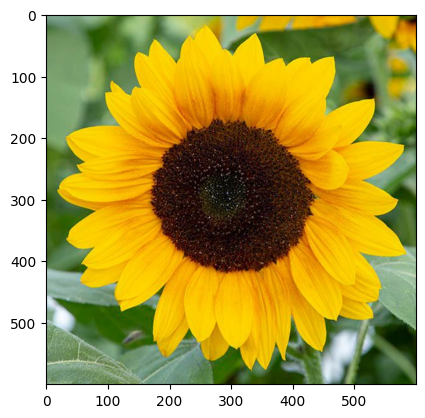

In [2]:
input_image = "../imager/sunflower/sunflower1.jpg"
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(input_image)
plt.imshow(img)

img_bytes = open(input_image, "rb").read()

In [3]:
links = match_model.predict(img_bytes)

In [4]:
print(links)

['https://www.amazon.in/Kraft-Seeds-Calendula-Flowering-Gardening/dp/B0B78HHW59/ref=sr_1_6388?qid=1679213710&s=garden&sr=1-6388', 'https://www.amazon.in/Mukhi-Rudraksha-Quality-Nepal-Certified/dp/B076KRQBDX/ref=sr_1_17602?qid=1679145748&s=jewelry&sr=1-17602', 'https://www.amazon.in/Airex-Gaillardia-Double-Summer-Flower/dp/B0799SC32F/ref=sr_1_5529?qid=1679213694&s=garden&sr=1-5529', 'https://www.amazon.in/SRI-SAI-FORESTRY-Sevanti-Chrysanthemum/dp/B0B8K4QDFZ/ref=sr_1_6545?qid=1679213714&s=garden&sr=1-6545', 'https://www.amazon.in/M-Tech-Gardens-Zinnia-Ornamental-Growing/dp/B07S348P72/ref=sr_1_9426?qid=1679213764&s=garden&sr=1-9426']


# Testing the model with a different image

In [5]:
import pandas as pd
test_df = pd.read_csv("amazon_products_sample_test.csv", encoding='iso-8859-1')

In [14]:
test_df = test_df.sample(10)
display(test_df)

,name,image,link
41,"Shoulder Bag for Women, Faux Leather Women's S...",https://m.media-amazon.com/images/I/61HEgPrrlw...,https://us.amazon.com/dp/B0D3HJQ4Y2/ref=sspa_d...
95,Bedsure Mustard Yellow Fleece Blanket Throw Bl...,https://m.media-amazon.com/images/I/81kT3AeF64...,https://www.amazon.com/dp/B087RDRJ3K?ots=1&maa...
24,Urban Effort Mesh Back Cap - for Men and Women...,https://m.media-amazon.com/images/I/71VZxsJLqZ...,https://us.amazon.com/dp/B09XWN77W7/ref=sspa_d...
4,JMIERR Men's Quilted Sweatshirt Casual Long Sl...,https://m.media-amazon.com/images/I/714X3RJ2Dk...,https://www.amazon.com/JMIERR-Quilted-Sweatshi...
13,Cole Haan womens Viola Skimmer,https://m.media-amazon.com/images/I/411zsXIpjC...,https://us.amazon.com/Cole-Haan-Womens-Skimmer...
25,"American Flag Trucker Hats for Men, Mesh Back ...",https://m.media-amazon.com/images/I/81vUzBTefd...,https://us.amazon.com/dp/B0D3BDKB7C/ref=sspa_d...
68,"It's a 10 Haircare Miracle Leave-In product, 1...",https://m.media-amazon.com/images/I/517b7RkKn8...,https://www.amazon.com/Its-10-Miracle-Leave-Pr...
46,ARTIX CL750 On-Ear Headphones Wired with Mic ...,https://m.media-amazon.com/images/I/71PJPwlMrp...,https://www.amazon.com/wired-headphones-comput...
9,COOFANDY Mens Knitted Turtleneck Slim Fit Turt...,https://m.media-amazon.com/images/I/81pGR-NXs7...,https://www.amazon.com/dp/B0D4LWBDC3/ref=sspa_...
76,Colgate Optic White Overnight Teeth Whitening ...,https://m.media-amazon.com/images/I/71GDd3UE7M...,https://www.amazon.com/dp/B082YHNBMG?ots=1&lin...


In [7]:
import requests

# download image
def download_image(url):
    response = requests.get(url)
    if response.status_code != 200:
        return None
    img_data = response.content
    return img_data

In [16]:
X_test = []
for i, row in test_df.iterrows():
    img_bytes = download_image(row["image"])
    X_test.append(img_bytes)

Y_test = list(test_df["link"])

In [17]:
scores = match_model.eval(X_test, Y_test)
print(scores)

100%|██████████| 10/10 [11:01<00:00, 66.12s/it]

[(0.790405, 0.10809993), (0.7967589, 0.057702724), (0.78251255, 0.10307552), (0.8980351, 0.021068908), (0.8554144, 0.022247255), (0.8149593, 0.018223822), (0.6935749, 0.07286222), (0.85133344, 0.033039868), (0.864941, 0.022667008), (0.7581091, 0.079469465)]
